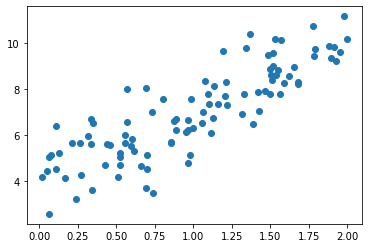

In [1]:
import numpy as np
import matplotlib.pyplot as plt
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)
plt.scatter(X, y)
plt.show()

In [2]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[3.99225567],
       [3.0065493 ]])

In [8]:
X_new = np.array([[0],[2]])

In [9]:
X_new

array([[0],
       [2]])

In [11]:
X_new_b = np.c_[np.ones((2,1)),X_new]

In [12]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [13]:
y_predict = X_new_b.dot(theta_best)

In [14]:
y_predict

array([[ 3.99225567],
       [10.00535427]])

(0.0, 2.0, 0.0, 15.0)

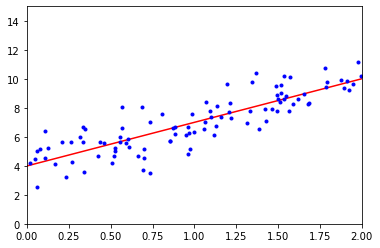

In [17]:
plt.plot(X_new,y_predict,"r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [20]:
theta_best_svd, residuals, rank,s = np.linalg.lstsq(X_b,y,rcond=1e-6)

In [21]:
theta_best_svd

array([[3.99225567],
       [3.0065493 ]])

## 경사 하강법

In [22]:
eta = 0.1
n_iterations = 1000
m=100

In [24]:
theta = np.random.randn(2,1)

In [25]:
 for iteration in range(n_iterations) : 
        gradients = 2/m * X_b.T.dot(X_b.dot(theta)-y)
        theta = theta - eta*gradients

In [26]:
theta

array([[3.99225567],
       [3.0065493 ]])

## 확률적 경사 하강법 

In [27]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t) : 
    return t0/(t+t1)

In [28]:
theta = np.random.randn(2,1)

In [32]:
for epoch in range(n_epochs) :
    for i in range(m) :
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = y[random_index : random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients

In [33]:
theta

array([[3.97305885],
       [3.0121371 ]])

# 4.3  다항 회귀

In [34]:
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5* X**2 +X +2 +np.random.randn(m,1)

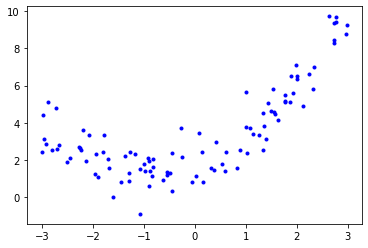

In [36]:
plt.plot(X,y,"b.")

In [37]:
from sklearn.preprocessing import PolynomialFeatures 

In [39]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)

In [45]:
X_poly = poly_features.fit_transform(X)

In [41]:
X[0]

array([1.76436801])

In [46]:
X_poly[0] # X_poly는 원래 특성과 특성의 제곱을 포함한다.

array([1.76436801, 3.11299449])

In [47]:
lin_leg = LinearRegression()
lin_leg.fit(X_poly,y)

LinearRegression()

In [50]:
lin_leg.intercept_,lin_leg.coef_

(array([1.75294851]), array([[0.97779485, 0.560311  ]]))

# 4-4 학습곡선

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [54]:
def plot_learing_curves(model,X,y) :
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)) :
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
        val_errors.append(mean_squared_error(y_val,y_val_predict))
    plt.plot(np.sqrt(train_errors),"r-+", linewidth=2, label = "훈련세트")
    plt.plot(np.sqrt(val_errors),"b-", linewidth=3, label = "검증세트")

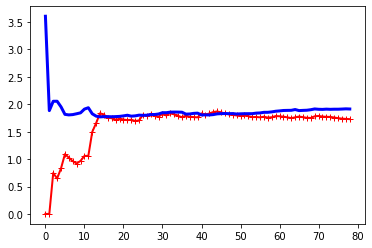

In [55]:
lin_leg = LinearRegression() #  과소적합 그래프
plot_learing_curves(lin_leg,X,y)

In [57]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg",LinearRegression()),
])

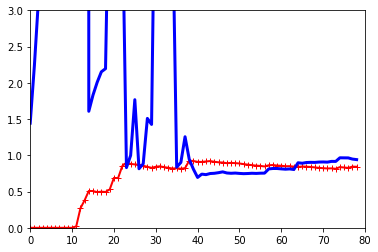

In [59]:
plot_learing_curves(polynomial_regression,X,y) # 과대 적합인데 과대적합처럼 안나왔네..?
plt.axis([0,80,0,3])
plt.show()